In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../Algorithm encapsulation"))
sys.path.append(os.path.join(os.getcwd(),".."))
print(sys.path)
from LMPband import LMPband
import pandas as pd
from ga_platoon import max_dt

['f:\\workspace\\jupyter\\论文\\graduation thesis\\Case Analysis', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\wor

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("./data/distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 14
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase[0])
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15
qb_x=np.ones_like(sg)*20
cap=np.ones_like(sg,dtype=int)*3

spd_on=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","上行速度数据.csv"),index_col=0)
spd_in=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","下行速度数据.csv"),index_col=0)

In [4]:
lmpb=LMPband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb,qb_x,cap,ex, dwt, 
           linspace, be, speedScope,speedVar,speedScope,speedVar,spd_on,spd_in)

lmpb._M1_solve()


conflict(s): 0
None
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective -14119.6300.
Tried aggregator 3 times.
MIP Presolve eliminated 9447 rows and 434 columns.
MIP Presolve modified 1316 coefficients.
Aggregator did 852 substitutions.
Reduced MIP has 1104 rows, 580 columns, and 3930 nonzeros.
Reduced MIP has 147 binaries, 76 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (19.27 ticks)
Probing fixed 2 vars, tightened 65 bounds.
Probing time = 0.00 sec. (0.42 ticks)
Cover probing fixed 0 vars, tightened 4 bounds.
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve eliminated 23 rows and 17 columns.
MIP Presolve modified 258 coefficients.
Reduced MIP has 1081 rows, 563 columns, and 3859 nonzeros.
Reduced MIP has 143 binaries, 76 generals, 0 SOSs, and 0 indica

In [5]:
lmpb._M2_solve()

[[array([0.0199, 0.0795, 0.1561, 0.151 , 0.072 , 0.0169]), array([0.0003, 0.0051, 0.0384, 0.1265, 0.1814, 0.1134]), array([0.0009, 0.0029, 0.0082, 0.0192, 0.0371, 0.0594])], [array([0.0107, 0.0586, 0.1469, 0.1691, 0.0894, 0.0217]), array([0.0031, 0.0381, 0.153 , 0.203 , 0.089 , 0.0129]), array([0.0002, 0.0041, 0.0387, 0.1404, 0.1935, 0.1014])]]
conflict(s): 0
None
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)
    1         2      1   1.8483886044e+04       3008         0.81           518.38

Performing restart 1
    2         1      1   5.2111190365e+01       4758         2.58          1770.84
status  = multi-objective optimal
time    = 3.406 s.
problem = MILP
gap     = 5.41012e+72%

object value 18484


In [6]:
a=lmpb.get_dataframe()
a

,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,800.0,24.985632,24.985632,0.000000,24.484375,0.000000,33.668582,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24.985632,33.668582,15.000000,15.000000,86.412322,78.563732
1,2.0,520.0,23.036398,23.036398,0.000000,32.605364,0.000000,32.605364,86.412322,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.036398,32.605364,15.000000,15.000000,65.000000,43.448276
2,3.0,500.0,23.036398,23.036398,0.000000,20.378352,0.000000,20.378352,63.785406,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.036398,20.378352,15.000000,15.000000,59.373119,50.714286
3,4.0,490.0,22.593391,22.593391,0.000000,20.378352,0.000000,20.378352,33.050766,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.593391,20.378352,15.000000,15.000000,53.823036,35.000000
4,5.0,370.0,22.593391,22.593391,0.000000,22.593391,0.000000,22.593391,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.593391,22.593391,20.289751,15.509882,66.539751,41.938453
5,6.0,254.0,19.893324,17.601089,19.893324,53.212596,0.000000,53.212596,0.000000,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,2.083779e-02,19.893324,49.800803,15.000000,15.000000,31.750000,31.750000
6,7.0,585.0,19.893324,17.601089,19.893324,16.481532,0.000000,19.893324,31.750000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19.893324,19.893324,30.000000,30.000000,103.125000,103.125000
7,8.0,1020.0,17.139375,0.000000,17.139375,17.139375,25.968750,0.000000,11.348344,1.0,...,1.000000e-08,1.000000e-08,2.075000e-01,1.000000e-08,17.139375,17.139375,15.000000,15.000000,95.624406,112.125594
8,9.0,409.0,30.954750,0.000000,30.954750,17.139375,25.968750,0.000000,56.956938,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,30.954750,17.139375,15.000000,15.000000,48.991071,51.840054
9,10.0,547.0,39.368625,0.000000,39.368625,30.954750,30.954750,0.000000,103.875000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,35.100768,30.954750,15.000000,15.000000,54.071429,54.071429


[[24.98563218 37.74425287 23.03639847  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.         24.54262452 22.5933908  53.21259592
  19.89332432 17.139375   30.95475    39.368625   50.89875    39.368625
  31.1625    ]
 [33.66858238 32.60536398 20.37835249  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          7.97413793  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.         22.50478927 12.22701149  0.
  17.60108942 25.96875    35.3175     35.005875   24.410625   35.005875
  19.32075   ]
 [13.99904215  0.         19.49233716 22.50478927  0.          0.
  11.37930897 27.63075     0.         29.5005     13.7115      0.
  29.085     ]
 [ 0.         18.25191571  0.          0.         43.41475096 28.65293626
  21.03944177  0.       

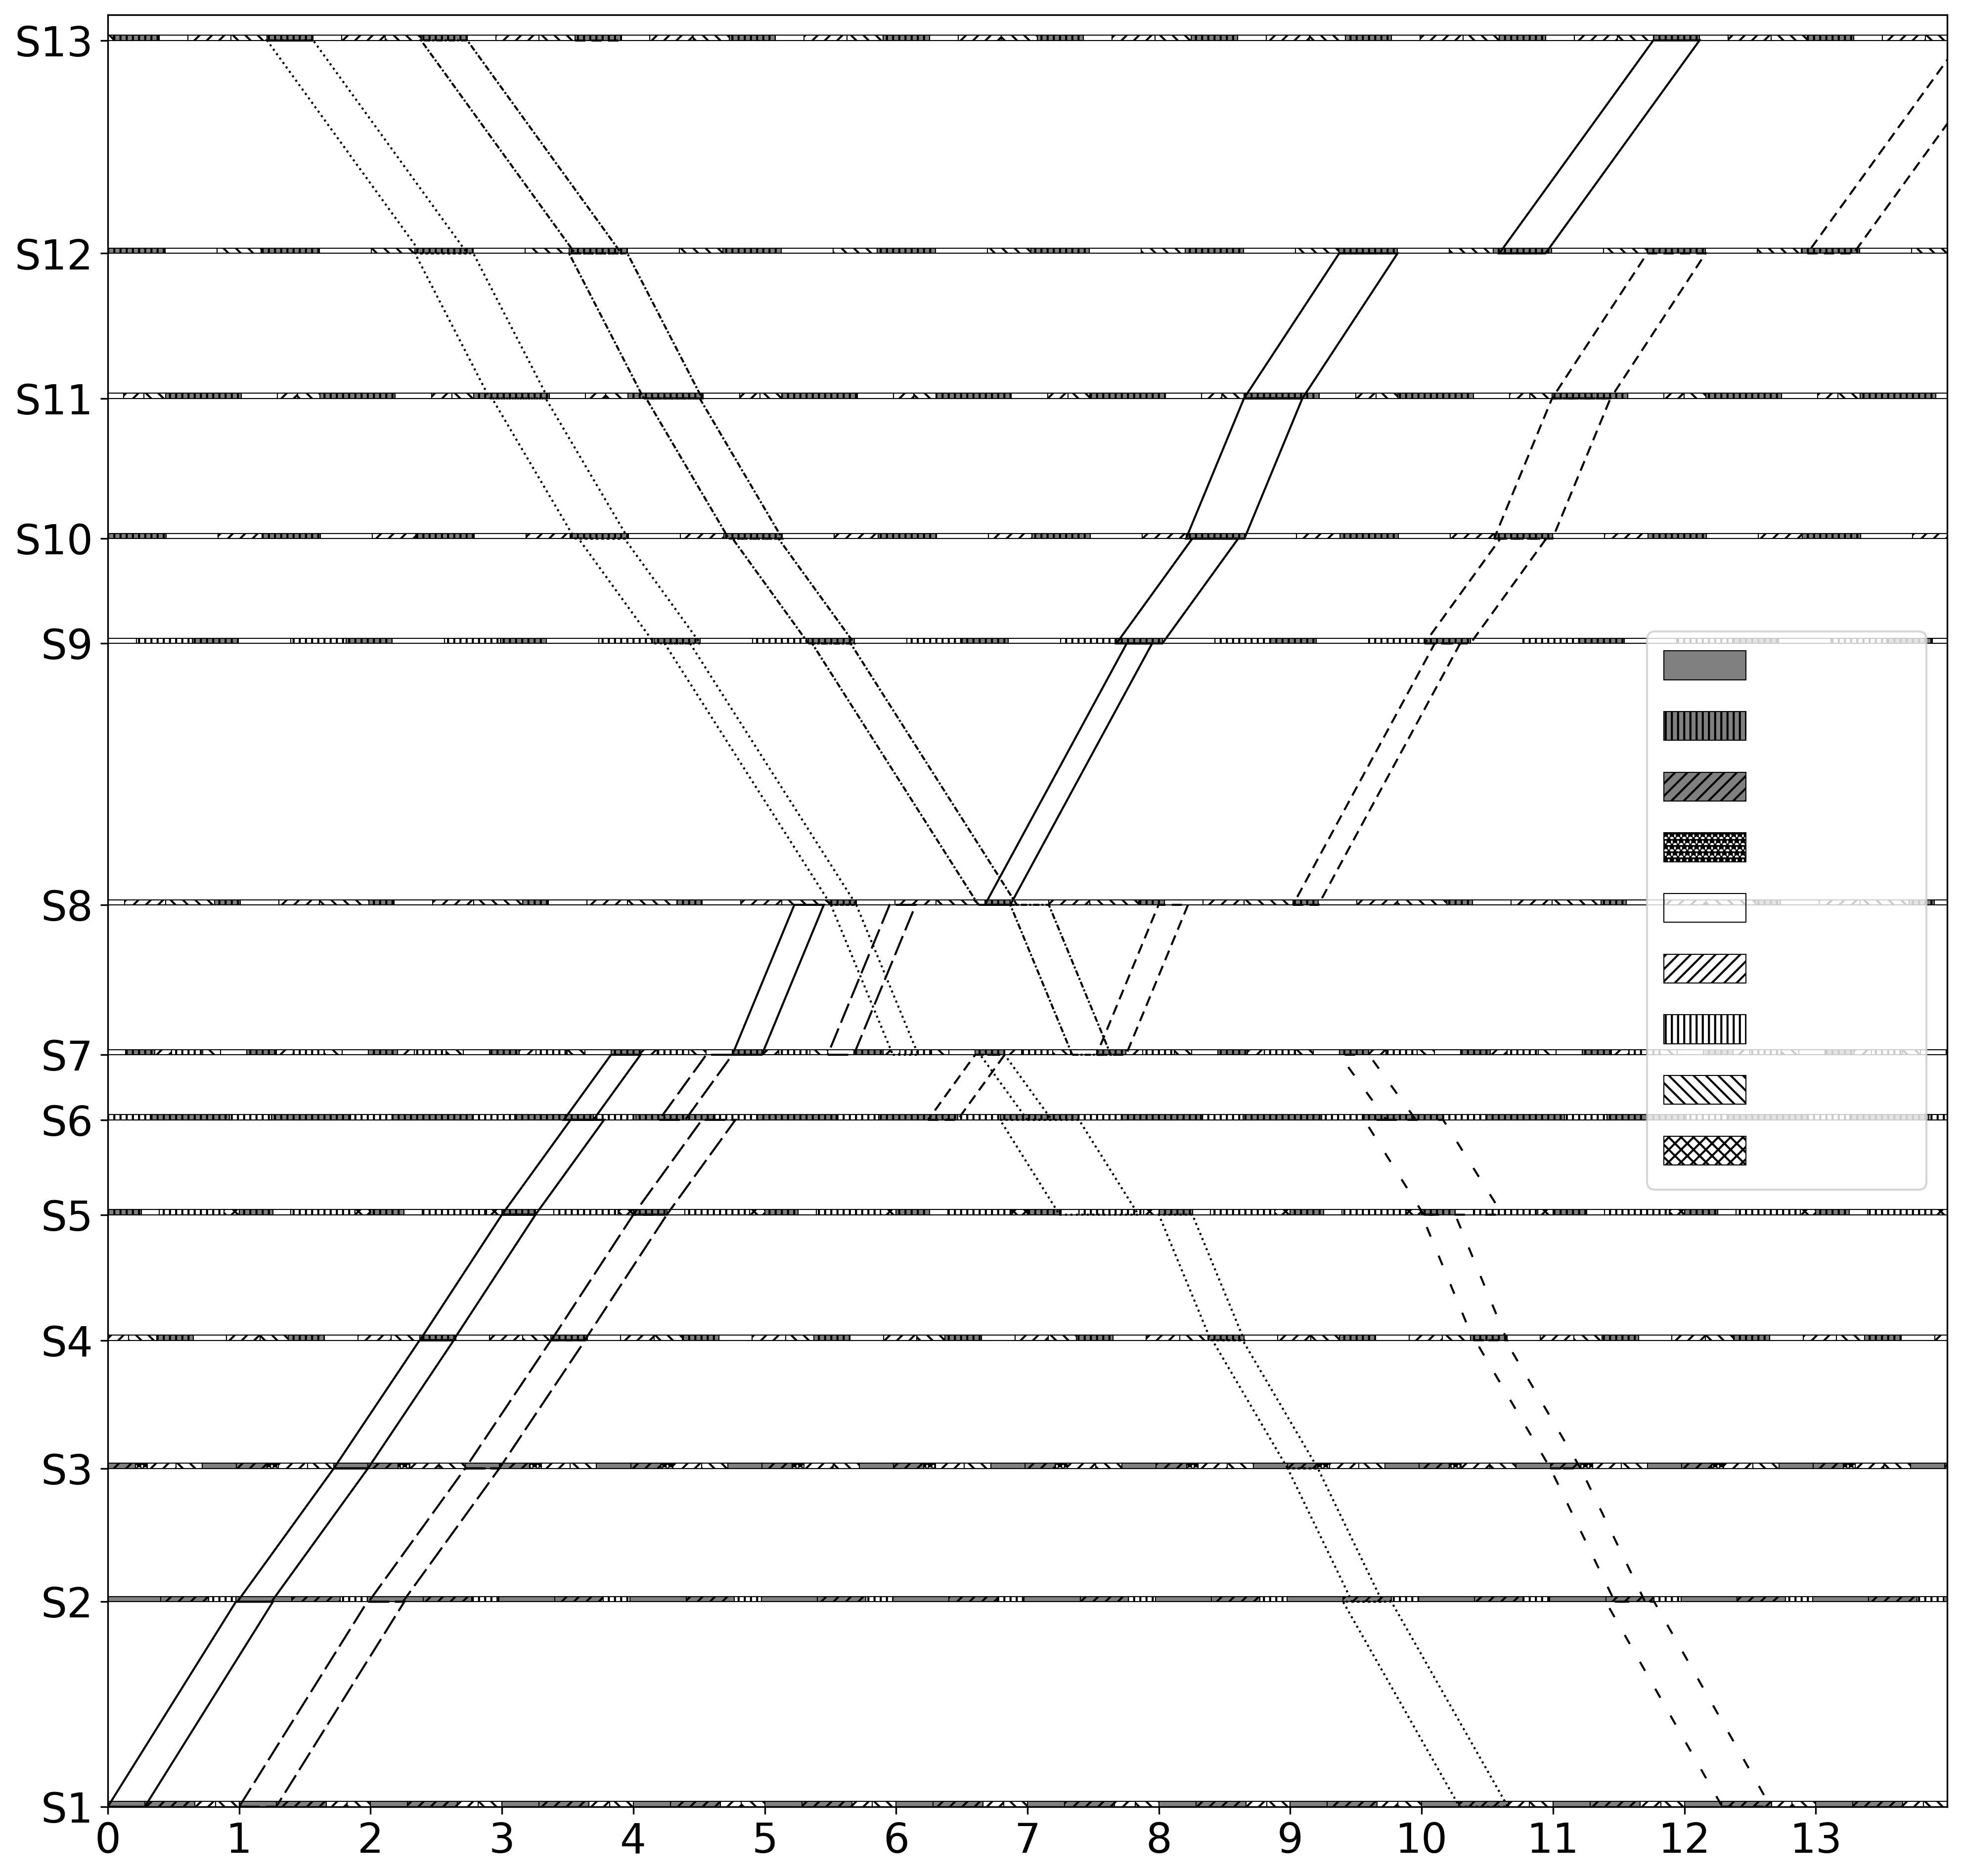

In [7]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1))  },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmpb.draw_car_bound("./时距图",colors,legends,2,linestyles)

1150.2191339285714 12.981932711583017


AttributeError: 'DataFrame' object has no attribute 'on_bus_v1'

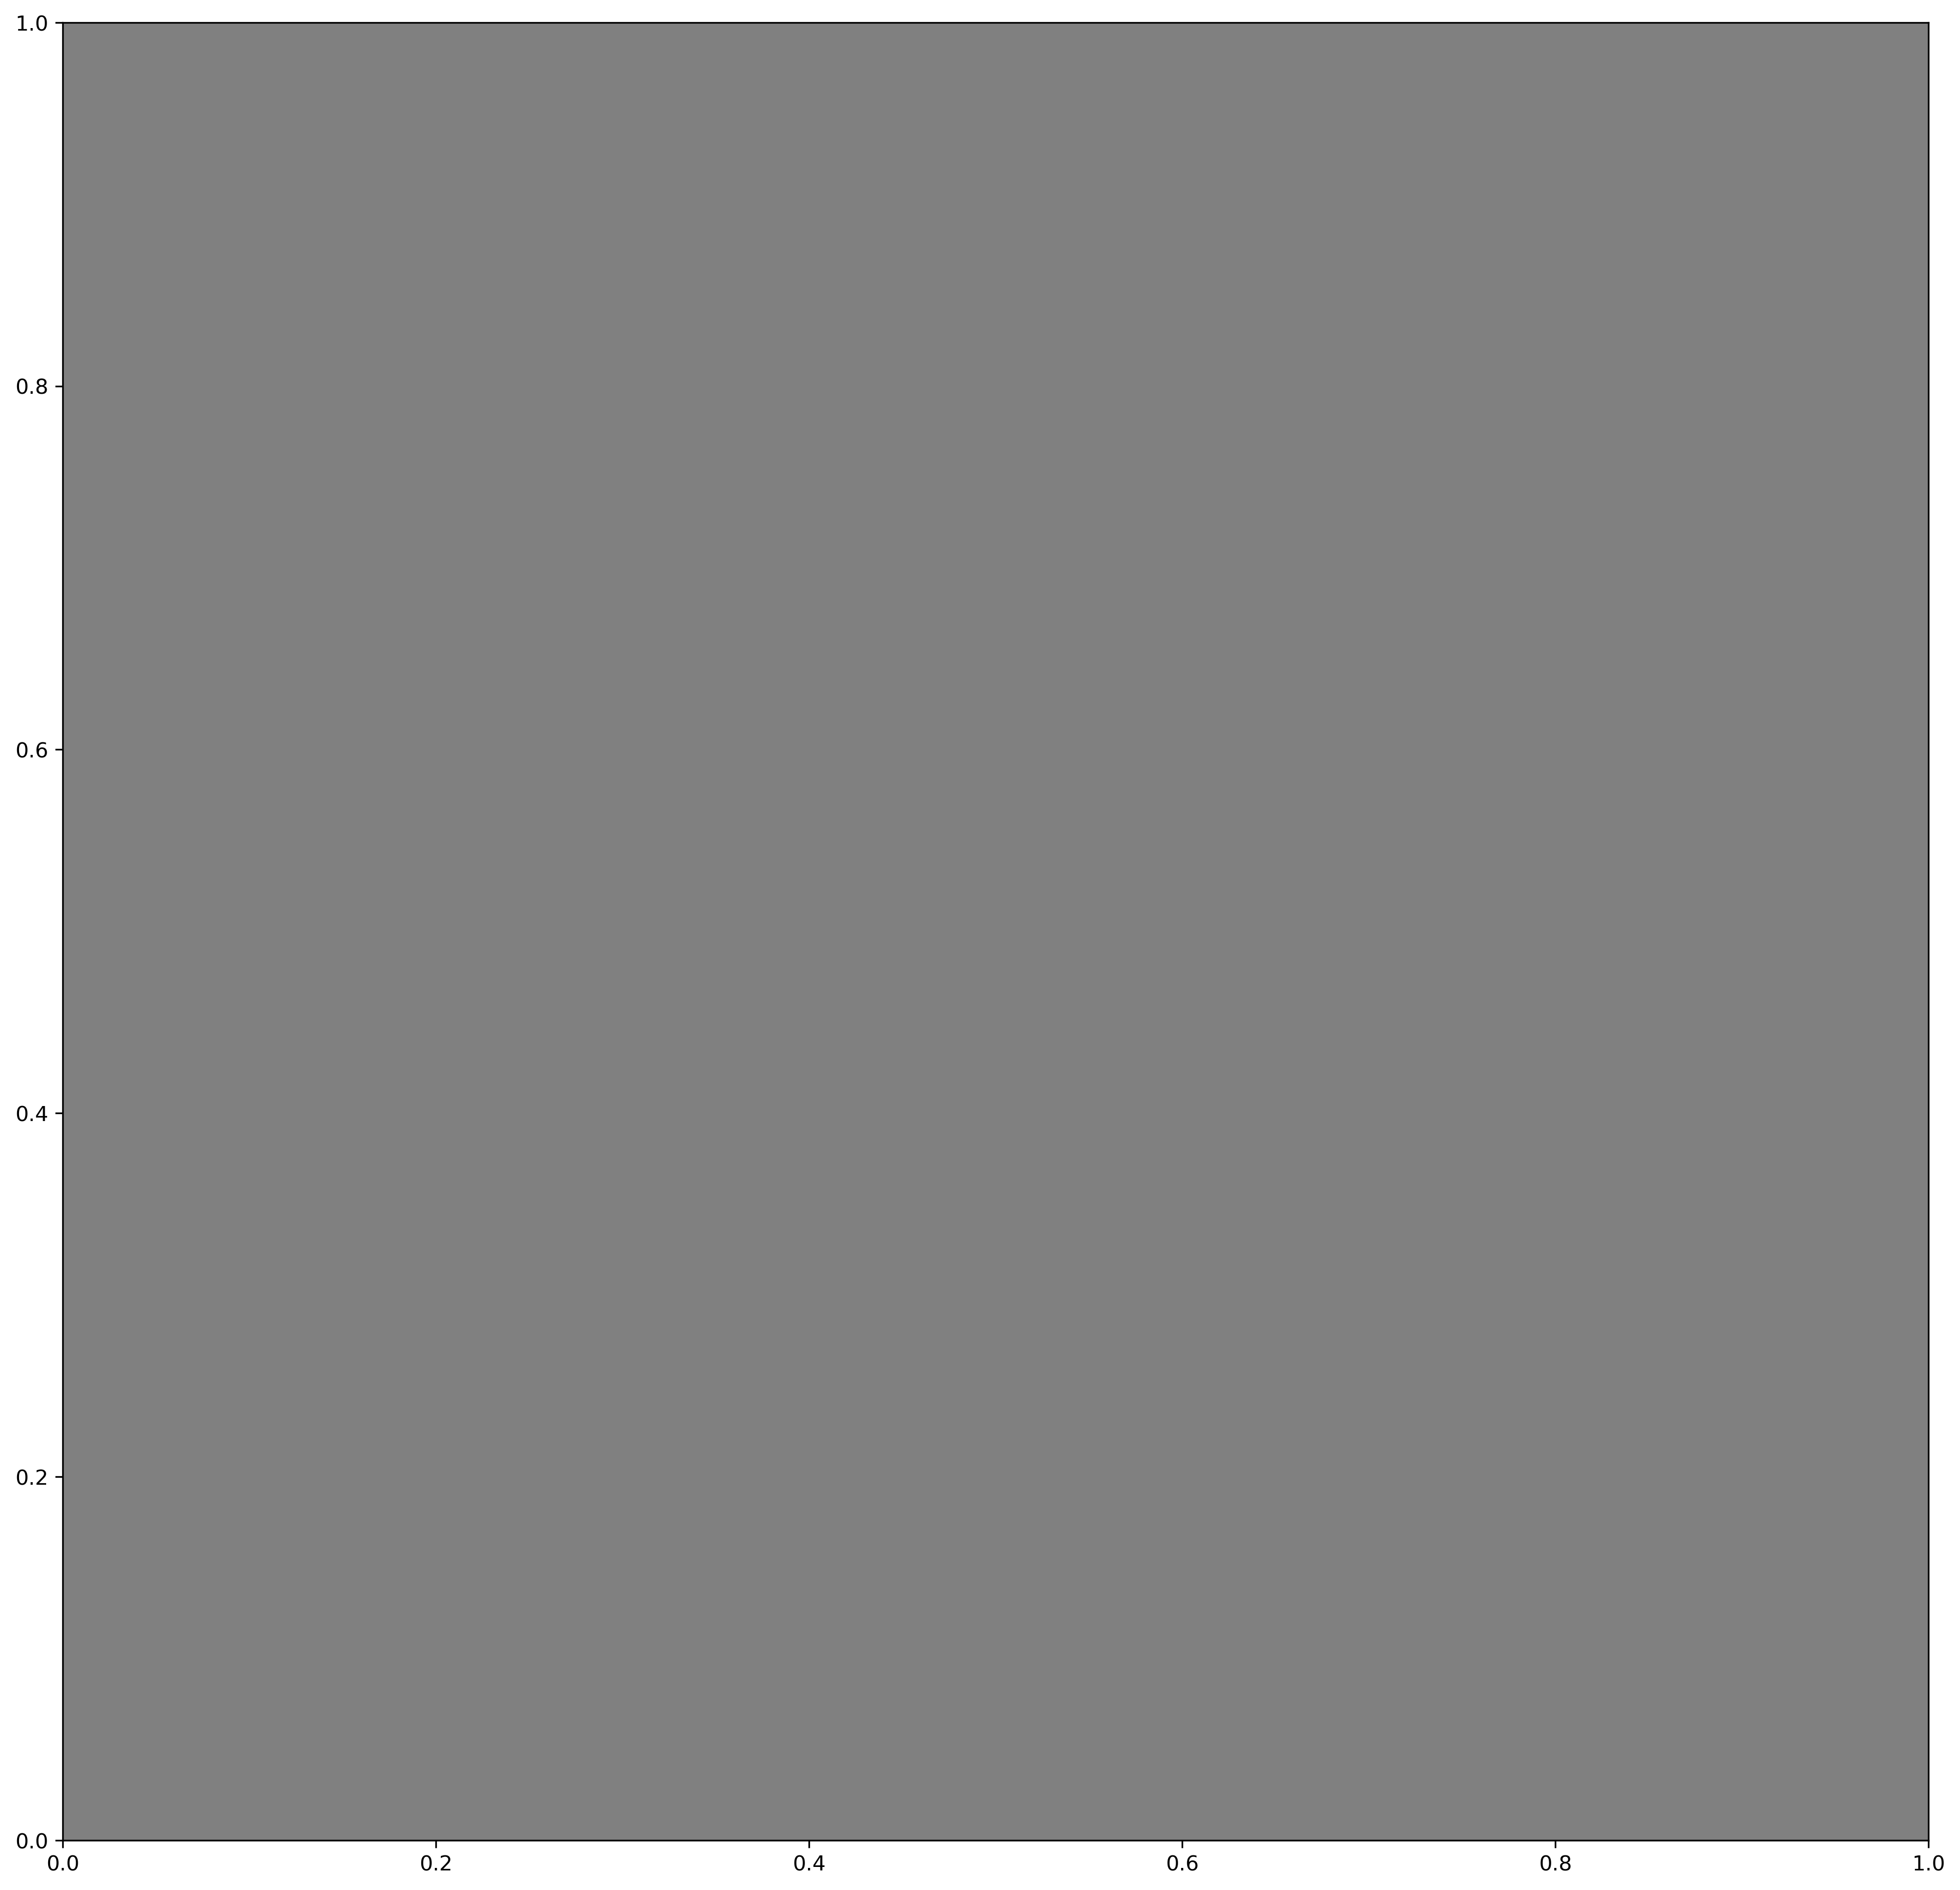

In [8]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
lmpb.draw_bus_bound("./公交时距图",colors)

In [ ]:
from  SimAnalysis import SimAnalysis
df=lmpb.get_dataframe()
fg=lmpb.get_fphase()
sim=SimAnalysis(df,phase,ex,os.path.join(os.getcwd(),"..","vissim","aa","zhongsan.inp"),
               os.path.join(os.getcwd(),"..","vissim","aa","vissim.ini"),
               os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.inp"),
               fg)
sim.start()
spdx=sim.analysis_speed(os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.fzp"))
delayx=sim.analysis_delay(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.vlz'))
tvltx=sim.analysis_traveltime(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.rsz'))

In [ ]:
delayx